In [1]:
#Import libraries

import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import sklearn.model_selection as skm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data csv files

train = pd.read_csv('Dataset_Training.csv')
test = pd.read_csv('Dataset_Test.csv')

# Data Exploration and Preprocessing

In [3]:
#Check what the data looks like

train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
2,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
3,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
4,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0


In [4]:
# Check the shape of data

print("Train Data Shape:", train.shape)
print("Test Data Shape:", test.shape)

Train Data Shape: (519, 31)
Test Data Shape: (50, 31)


In [5]:
#Check for any missing data

print("Nulls in training data: ", train.isnull().sum().sum())
print("Nulls in test data: ", test.drop(['y'], axis = 1).isnull().sum().sum())

Nulls in training data:  0
Nulls in test data:  0


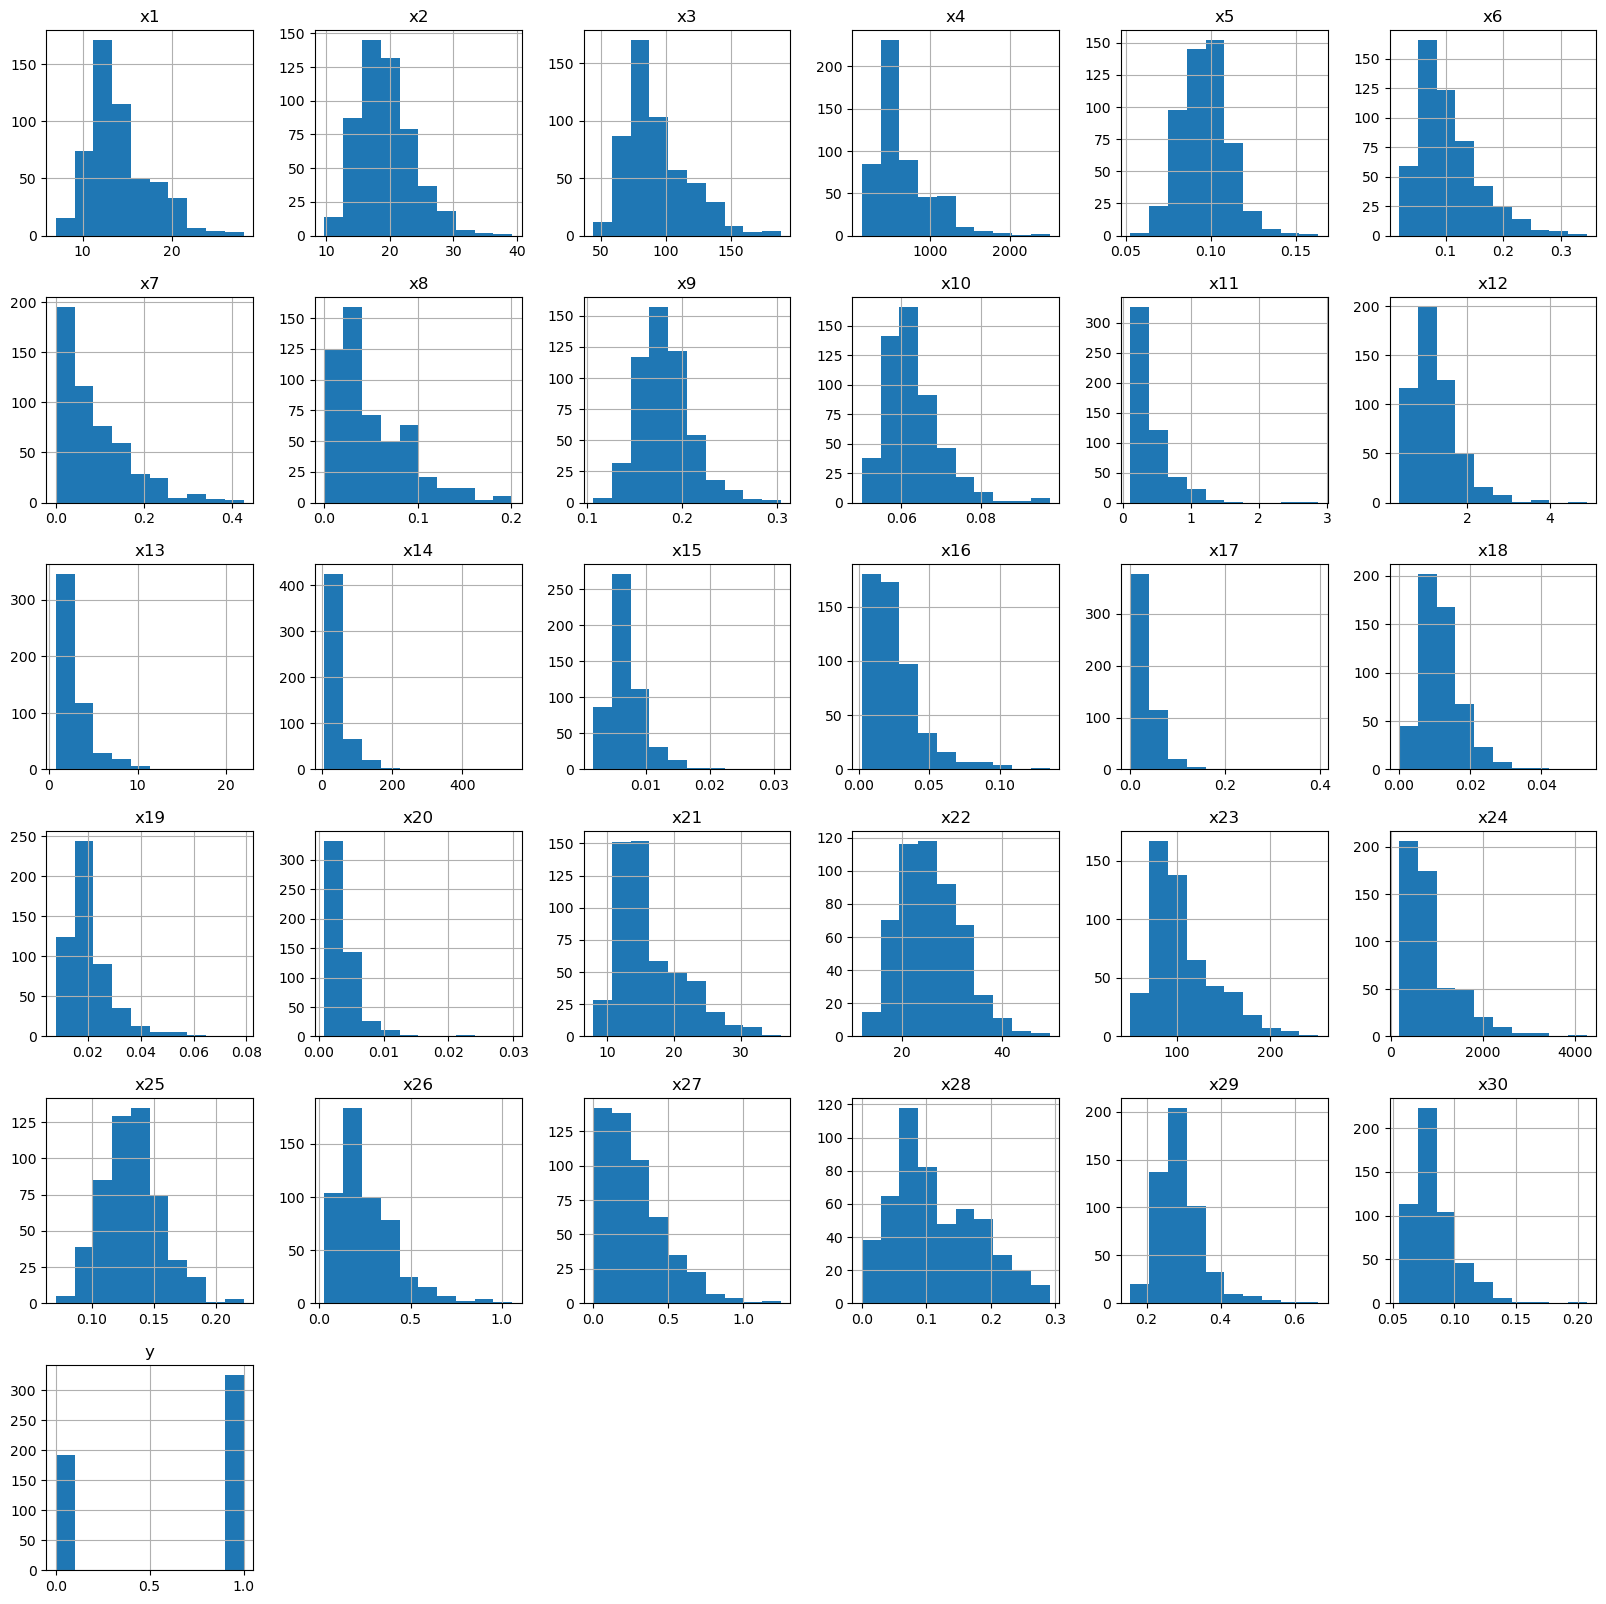

In [6]:
#Check how each feature is distributed 

train.hist(figsize = (20, 20))
plt.show()

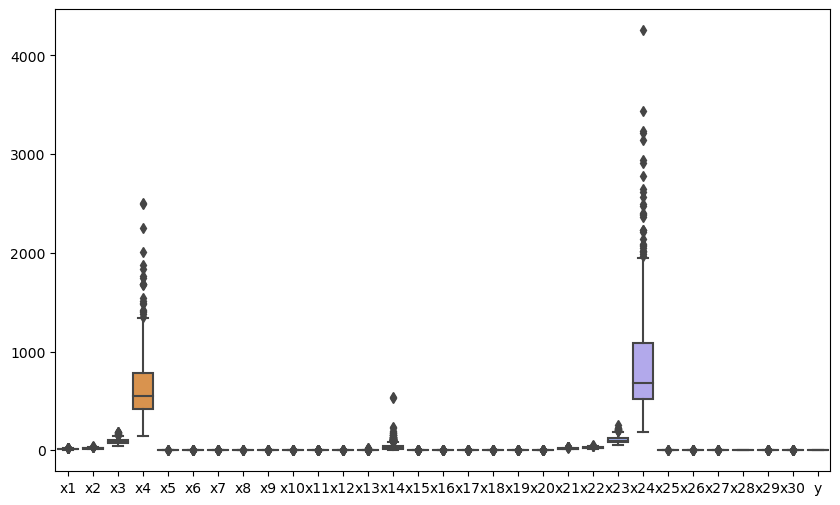

In [7]:
#Check outliers

plt.subplots(figsize=(10, 6))
sns.boxplot(data=train)
plt.show()

In [8]:
# Specify the column names to check for outliers
columns_to_check = ['x4', 'x24']  

# Calculate the IQR for the specified columns
Q1 = train[columns_to_check].quantile(0.25)
Q3 = train[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower thresholds for outlier detection
lower_threshold = Q1 - 2.5 * IQR
upper_threshold = Q3 + 2.5 * IQR

# Identify the potential outliers in the specified columns
outliers_mask = ((train[columns_to_check] < lower_threshold) | (train[columns_to_check] > upper_threshold)).any(axis=1)
outliers_data = train[outliers_mask]
outliers_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
19,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,...,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,0
75,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
113,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,0.06877,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,0
163,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,0
193,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,0.05525,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,0
214,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,0.06309,...,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,0
242,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,0.05674,...,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218,0
311,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,0.1797,0.05506,...,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738,0
323,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,0.1956,0.06121,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,0
336,21.71,17.25,140.9,1546.0,0.09384,0.08562,0.1168,0.08465,0.1717,0.05054,...,26.44,199.5,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494,0


In [9]:
#Remove outliers

train = train[~outliers_mask]  
train = train.reset_index(drop=True)  
print(train.shape)  

(506, 31)


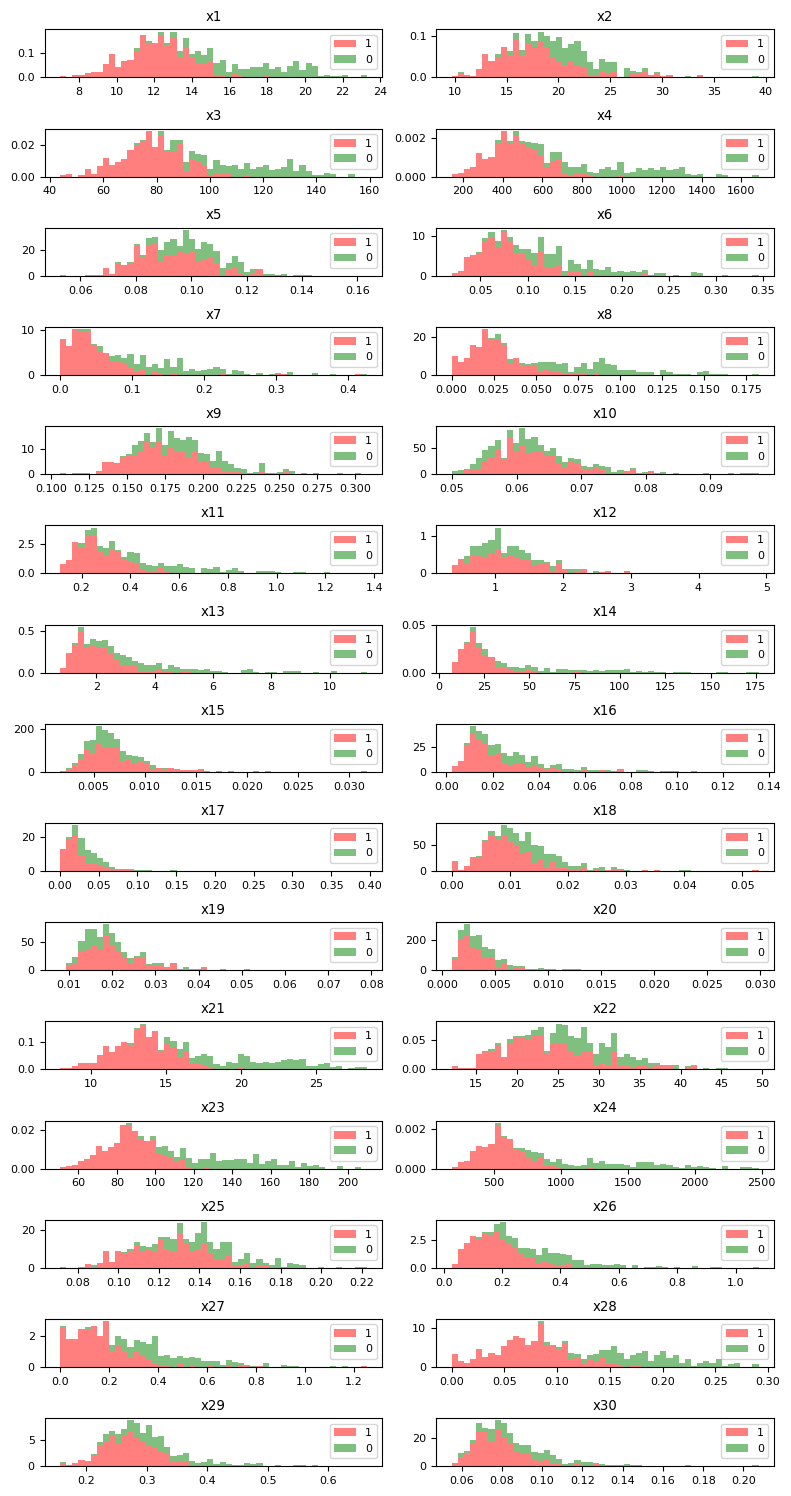

In [10]:
#Features vs classes in y 

features = list(train.columns)
train1 = train[train['y'] ==1]
train0 = train[train['y'] ==0]

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(8, 15))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(train[features[idx]]) - min(train[features[idx]])) / 50
    ax.hist([train1[features[idx]], train0[features[idx]]], bins=np.arange(min(train[features[idx]]), max(train[features[idx]]) + binwidth, binwidth), alpha=0.5, stacked=True, density=True, label=['1', '0'], color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(features[idx])
plt.tight_layout()
plt.show()

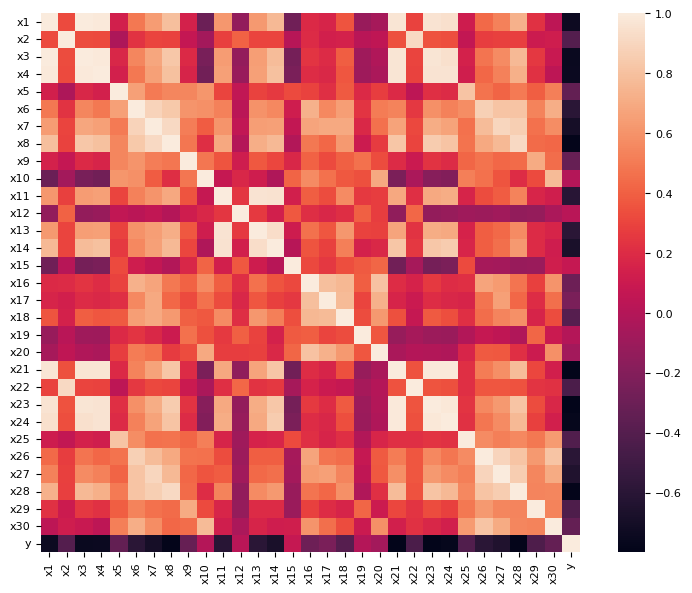

In [11]:
# Check if any of the features have strong correlation

corr = train.corr()
fig = plt.figure(figsize = (10, 7))

sns.heatmap(corr, vmax = 1, square = True)
plt.show()

# Modelling

In [12]:
X_train = train.drop(['y'], axis = 1)
y_train = train['y']

X_test = test.drop(['y'], axis = 1)
y_test = test['y']

In [13]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

**Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear', random_state = 0)
logreg.fit(x_train, y_train)

print("Score on training: ", logreg.score(x_train, y_train))

cross_val_scores = cross_val_score(logreg, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training:  0.9861660079051383
Cross-Validation Scores: [0.97058824 0.97029703 0.98019802 0.97029703 0.99009901]
Mean CV Score: 0.9762958648806057
CV score Variance: 0.000062


In [15]:
logit = LogisticRegression(solver = 'liblinear',
                                random_state = 0)
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10, 100]}

grid = skm.GridSearchCV(estimator = logit, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
grid.fit(X_train, y_train)

best_parameters = grid.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best parameters for using this model is {'C': 2}


In [16]:
logreg_grid = LogisticRegression(C = best_parameters['C'], solver = 'liblinear',
                                random_state = 0)

logreg_grid.fit(x_train, y_train)

print("Score on training: ", logreg_grid.score(x_train, y_train))

cross_val_scores = cross_val_score(logreg_grid, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training:  0.9861660079051383
Cross-Validation Scores: [0.97058824 0.97029703 0.98019802 0.97029703 0.99009901]
Mean CV Score: 0.9762958648806057
CV score Variance: 0.000062


**K-Nearest Neighbours**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)
print("Score on training: ", knn_model.score(x_train, y_train))

cross_val_scores = cross_val_score(knn_model, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training:  0.9762845849802372
Cross-Validation Scores: [0.96078431 0.95049505 0.98019802 0.96039604 0.94059406]
Mean CV Score: 0.9584934964084644
CV score Variance: 0.000173


In [18]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = skm.GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [19]:
knn_gscv.best_params_

{'n_neighbors': 8}

In [20]:
knn = knn_gscv.best_estimator_
knn.fit(x_train, y_train)
print("Score on training: ", knn.score(x_train, y_train))

cross_val_scores = cross_val_score(knn, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training:  0.9723320158102767
Cross-Validation Scores: [0.96078431 0.95049505 0.99009901 0.97029703 0.99009901]
Mean CV Score: 0.9723548825470782
CV score Variance: 0.000249


**Naive Bayes**

In [21]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [22]:
print("Score on training: ", NB.score(x_train, y_train))

cross_val_scores = cross_val_score(NB, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training:  0.9446640316205533
Cross-Validation Scores: [0.92156863 0.91089109 0.95049505 0.97029703 0.91089109]
Mean CV Score: 0.9328285769753446
CV score Variance: 0.000561


**Support Vector Machine**

In [23]:
#Linear SVC

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

svm = LinearSVC(C = 0.001, random_state = 0)
svm.fit(x_train, y_train)

print("Score on training: "+ str(svm.score(x_train, y_train)))

Score on training: 0.974308300395257


In [24]:
kfold = skm.KFold(5, random_state = 0, shuffle = True)

grid = skm.GridSearchCV(svm, {'C': [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 8, 10, 100]},
                        refit=True, cv=kfold, scoring='accuracy')
grid.fit(x_train, y_train)
grid.best_params_

{'C': 0.1}

In [25]:
svm_grid = grid.best_estimator_
svm_grid.fit(x_train, y_train)

LinearSVC(C=0.1, random_state=0)

In [26]:
print("Score on training: "+ str(svm_grid.score(x_train, y_train)))

cross_val_scores = cross_val_score(svm_grid, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training: 0.9861660079051383
Cross-Validation Scores: [0.97058824 0.97029703 0.97029703 0.97029703 0.99009901]
Mean CV Score: 0.9743156668608037
CV score Variance: 0.000062


In [27]:
#Radial basis function kernel

svm_rbf = SVC(kernel = "rbf", gamma = 1, C=0.0001, random_state = 0)
svm_rbf.fit(x_train , y_train)
print("Score on training: "+ str(svm_rbf.score(x_train, y_train)))

Score on training: 0.6442687747035574


In [28]:
#Polynomial kernel function 

svm_poly = SVC(kernel = "poly", gamma = 'scale', degree = 3, C=0.0001, random_state = 0)
svm_poly.fit(x_train , y_train)
print("Score on training: "+ str(svm_poly.score(x_train, y_train)))

Score on training: 0.6442687747035574


**Linear Discriminant Analysis**

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(x_train, y_train)

lda_pred = lda_model.predict(x_train)

In [30]:
print("Score on training:", accuracy_score(y_train, lda_pred))

cross_val_scores = cross_val_score(lda_model, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training: 0.9604743083003953
Cross-Validation Scores: [0.94117647 0.94059406 0.95049505 0.96039604 0.97029703]
Mean CV Score: 0.9525917297612114
CV score Variance: 0.000131


**Quadratic Discriminant Analysis**

In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(x_train, y_train)

qda_pred = qda_model.predict(x_train)

In [32]:
print("Score on training:", accuracy_score(y_train, qda_pred))

cross_val_scores = cross_val_score(qda_model, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training: 0.9723320158102767
Cross-Validation Scores: [0.97058824 0.91089109 0.95049505 0.97029703 0.95049505]
Mean CV Score: 0.95055329062318
CV score Variance: 0.000473


**Decision Tree**

In [33]:
from sklearn.tree import DecisionTreeClassifier as DTC

dtc = DTC(criterion = 'entropy', max_depth = 3, random_state = 0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [34]:
print("Score on training:", accuracy_score(y_train, dtc.predict(x_train)))

cross_val_scores = cross_val_score(dtc, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training: 0.9545454545454546
Cross-Validation Scores: [0.90196078 0.9009901  0.92079208 0.92079208 0.92079208]
Mean CV Score: 0.9130654241894778
CV score Variance: 0.000090


In [35]:
DT = DTC(criterion='entropy', random_state = 0) # do not set max_depth
DT.fit(x_train, y_train)
print("Score on training:", accuracy_score(y_train, DT.predict(x_train)))

Score on training: 1.0


In [36]:
# compute the ccp_path parameter values on the training data for pruning the tree

ccp_path = DT.cost_complexity_pruning_path(x_train, y_train)
kfold = skm.KFold(10, random_state = 1, shuffle = True)

In [37]:
DT_grid = skm.GridSearchCV(DT, {'ccp_alpha': ccp_path.ccp_alphas},
             refit = True, cv = kfold, scoring='accuracy')
DT_grid.fit(x_train, y_train)
print("Score on training:", DT_grid.best_score_)

cross_val_scores = cross_val_score(DT_grid, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training: 0.9486666666666667
Cross-Validation Scores: [0.89215686 0.9009901  0.95049505 0.93069307 0.89108911]
Mean CV Score: 0.9130848378955543
CV score Variance: 0.000556


**Gradient Boosting Classifier**

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.01,
            max_depth = 3, random_state = 0)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [39]:
print("Score on training: ", gbc.score(x_train, y_train))

cross_val_scores = cross_val_score(gbc, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training:  0.9822134387351779
Cross-Validation Scores: [0.91176471 0.9009901  0.96039604 0.92079208 0.94059406]
Mean CV Score: 0.9269073966220152
CV score Variance: 0.000449


**Random Forests Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier as RF

# Bagging ensemble model using the random forest (RF) algorithm
RFC_bag = RF(max_features = X_train.shape[1],
         n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth = 3).fit(x_train, y_train)

print("Score on training:", accuracy_score(y_train, RFC_bag.predict(x_train)))

cross_val_scores = cross_val_score(RFC_bag, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training: 0.974308300395257
Cross-Validation Scores: [0.94117647 0.92079208 0.97029703 0.94059406 0.95049505]
Mean CV Score: 0.9446709376820035
CV score Variance: 0.000258


In [41]:
RFC = RF(max_features = 15, random_state = 0,  max_depth = 3).fit(x_train, y_train)
print("Score on training:", accuracy_score(y_train, RFC.predict(x_train)))

cross_val_scores = cross_val_score(RFC, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training: 0.9802371541501976
Cross-Validation Scores: [0.92156863 0.93069307 0.98019802 0.98019802 0.96039604]
Mean CV Score: 0.9546107551931664
CV score Variance: 0.000601


In [42]:
feature_names = list(X_train.columns)

In [43]:
feature_imp = pd.DataFrame({'importance': RFC.feature_importances_}, index = feature_names)
imp_features = feature_imp.sort_values(by='importance', ascending = False).head(3)
top_features = imp_features.index.tolist()  # Get the index values of the top features as a list
x_subset = X_train[top_features]  # Subset X_train using the top features

In [50]:
feature_imp.sort_values(by='importance', ascending = False)

,importance
x23,0.328969
x28,0.172493
x8,0.162044
x24,0.113877
x21,0.105988
x27,0.018007
x22,0.017175
x7,0.013335
x2,0.011958
x14,0.009880


In [44]:
RFs = RF(max_features = X_train.shape[1], random_state = 0, max_depth = 3).fit(x_subset, y_train)
print("Score on training:", accuracy_score(y_train, RFs.predict(x_subset)))

cross_val_scores = cross_val_score(RFs, x_train, y_train, cv = 5)
print("Cross-Validation Scores:", cross_val_scores)

mean_score = np.mean(cross_val_scores)
print("Mean CV Score:", mean_score)

variance = np.var(cross_val_scores)
variance = '{:.6f}'.format(variance)
print("CV score Variance:", variance)

Score on training: 0.9604743083003953
Cross-Validation Scores: [0.91176471 0.94059406 0.97029703 0.96039604 0.97029703]
Mean CV Score: 0.9506697728596389
CV score Variance: 0.000496


# Model Comparison

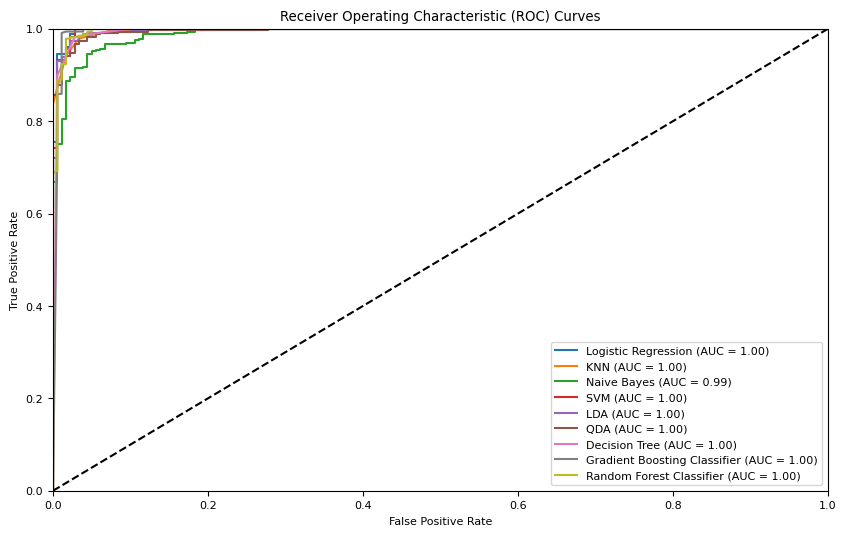

In [45]:
from sklearn.calibration import CalibratedClassifierCV

clf = CalibratedClassifierCV(svm_grid) 
clf.fit(x_train, y_train)

# Calculate the predicted probabilities for each model using x_train
y_pred_logreg = logreg_grid.predict_proba(x_train)[::,1]
y_pred_knn = knn.predict_proba(x_train)[::,1]
y_pred_NB = NB.predict_proba(x_train)[::,1]
y_pred_svm = clf.predict_proba(x_train)[::,1]
y_pred_lda = lda_model.predict_proba(x_train)[::,1]
y_pred_qda = qda_model.predict_proba(x_train)[::,1]
y_pred_DT = DT_grid.predict_proba(x_train)[::,1]
y_pred_gbc = gbc.predict_proba(x_train)[::,1]
y_pred_RFC = RFC.predict_proba(x_train)[::,1]

# Calculate AUC scores for each model using y_train and the corresponding predicted probabilities
auc_logreg = metrics.roc_auc_score(y_train, y_pred_logreg)
auc_knn = metrics.roc_auc_score(y_train, y_pred_knn)
auc_NB = metrics.roc_auc_score(y_train, y_pred_NB)
auc_svm = metrics.roc_auc_score(y_train, y_pred_svm)
auc_lda = metrics.roc_auc_score(y_train, y_pred_lda)
auc_qda = metrics.roc_auc_score(y_train, y_pred_qda)
auc_DT = metrics.roc_auc_score(y_train, y_pred_DT)
auc_gbc = metrics.roc_auc_score(y_train, y_pred_gbc)
auc_RFC = metrics.roc_auc_score(y_train, y_pred_RFC)

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold values for each model using y_train
fpr_logreg, tpr_logreg, thresholds_logreg = metrics.roc_curve(y_train, y_pred_logreg)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_train, y_pred_knn)
fpr_NB, tpr_NB, thresholds_NB = metrics.roc_curve(y_train, y_pred_NB)
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_train, y_pred_svm)
fpr_lda, tpr_lda, thresholds_lda = metrics.roc_curve(y_train, y_pred_lda)
fpr_qda, tpr_qda, thresholds_qda = metrics.roc_curve(y_train, y_pred_qda)
fpr_DT, tpr_DT, thresholds_DT = metrics.roc_curve(y_train, y_pred_DT)
fpr_gbc, tpr_gbc, thresholds_gbc = metrics.roc_curve(y_train, y_pred_gbc)
fpr_RFC, tpr_RFC, thresholds_RFC = metrics.roc_curve(y_train, y_pred_RFC)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = %.2f)' % auc_logreg)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %.2f)' % auc_knn)
plt.plot(fpr_NB, tpr_NB, label='Naive Bayes (AUC = %.2f)' % auc_NB)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %.2f)' % auc_svm)
plt.plot(fpr_lda, tpr_lda, label='LDA (AUC = %.2f)' % auc_lda)
plt.plot(fpr_qda, tpr_qda, label='QDA (AUC = %.2f)' % auc_qda)
plt.plot(fpr_DT, tpr_DT, label='Decision Tree (AUC = %.2f)' % auc_DT)
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting Classifier (AUC = %.2f)' % auc_gbc)
plt.plot(fpr_RFC, tpr_RFC, label='Random Forest Classifier (AUC = %.2f)' % auc_RFC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

# Plot AUC scores
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'LDA', 'QDA', 'Decision Tree', 'Gradient Boosting', 'Random Forest']


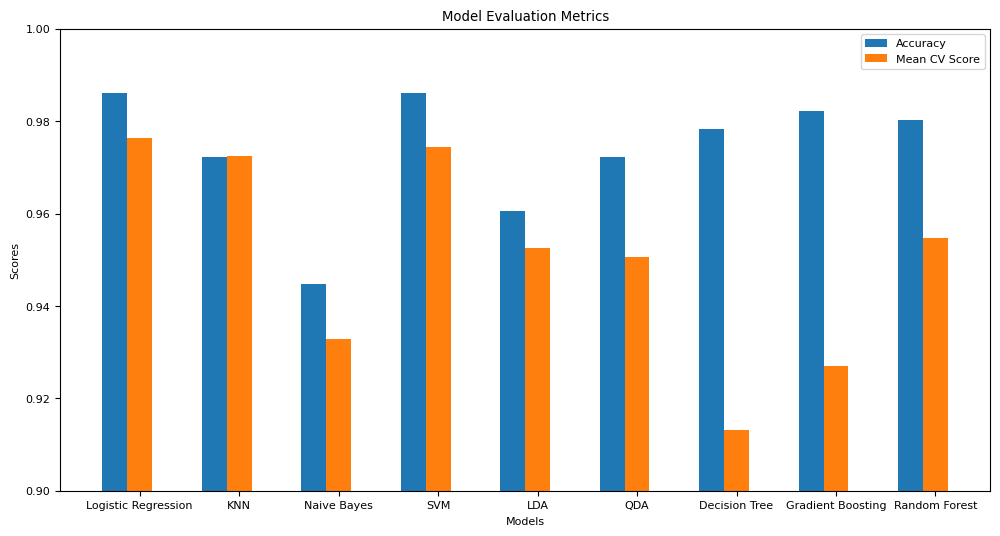

In [46]:
accuracy_scores = []
mean_cv_scores = []

# Calculate accuracy scores and cross-validation scores for each model
accuracy_scores.append(metrics.accuracy_score(y_train, logreg_grid.predict(x_train)))
accuracy_scores.append(metrics.accuracy_score(y_train, knn.predict(x_train)))
accuracy_scores.append(metrics.accuracy_score(y_train, NB.predict(x_train)))
accuracy_scores.append(metrics.accuracy_score(y_train, svm_grid.predict(x_train)))
accuracy_scores.append(metrics.accuracy_score(y_train, lda_model.predict(x_train)))
accuracy_scores.append(metrics.accuracy_score(y_train, qda_model.predict(x_train)))
accuracy_scores.append(metrics.accuracy_score(y_train, DT_grid.predict(x_train)))
accuracy_scores.append(metrics.accuracy_score(y_train, gbc.predict(x_train)))
accuracy_scores.append(metrics.accuracy_score(y_train, RFC.predict(x_train)))

mean_cv_scores.append(np.mean(cross_val_score(logreg_grid, x_train, y_train, cv=5)))
mean_cv_scores.append(np.mean(cross_val_score(knn, x_train, y_train, cv=5)))
mean_cv_scores.append(np.mean(cross_val_score(NB, x_train, y_train, cv=5)))
mean_cv_scores.append(np.mean(cross_val_score(svm_grid, x_train, y_train, cv=5)))
mean_cv_scores.append(np.mean(cross_val_score(lda_model, x_train, y_train, cv=5)))
mean_cv_scores.append(np.mean(cross_val_score(qda_model, x_train, y_train, cv=5)))
mean_cv_scores.append(np.mean(cross_val_score(DT_grid, x_train, y_train, cv=5)))
mean_cv_scores.append(np.mean(cross_val_score(gbc, x_train, y_train, cv=5)))
mean_cv_scores.append(np.mean(cross_val_score(RFC, x_train, y_train, cv=5)))

# Plot accuracy scores and mean cv scores
plt.figure(figsize=(12, 6))
x = np.arange(len(models))
bar_width = 0.25

plt.bar(x, accuracy_scores, width=bar_width, label='Accuracy')
plt.bar(x + bar_width, mean_cv_scores, width=bar_width, label='Mean CV Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')
plt.xticks(x + bar_width, models)
plt.legend()
plt.ylim(0.9, 1.0)
plt.show()

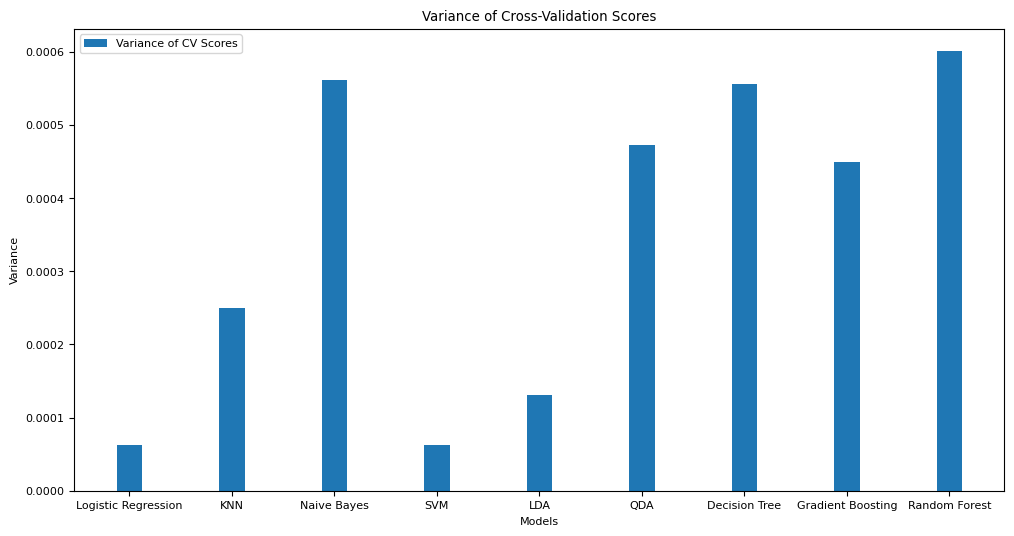

In [47]:
variance_cv_scores = [
    np.var(cross_val_score(logreg_grid, x_train, y_train, cv=5)),
    np.var(cross_val_score(knn, x_train, y_train, cv=5)),
    np.var(cross_val_score(NB, x_train, y_train, cv=5)),
    np.var(cross_val_score(svm_grid, x_train, y_train, cv=5)),
    np.var(cross_val_score(lda_model, x_train, y_train, cv=5)),
    np.var(cross_val_score(qda_model, x_train, y_train, cv=5)),
    np.var(cross_val_score(DT_grid, x_train, y_train, cv=5)),
    np.var(cross_val_score(gbc, x_train, y_train, cv=5)),
    np.var(cross_val_score(RFC, x_train, y_train, cv=5))
]

plt.figure(figsize=(12, 6))
x = np.arange(len(models))
bar_width = 0.25

plt.bar(x, variance_cv_scores, width=bar_width, label='Variance of CV Scores')

plt.xlabel('Models')
plt.ylabel('Variance')
plt.title('Variance of Cross-Validation Scores')
plt.xticks(x, models)
plt.legend()
plt.show()

# Predicting using best model

In [48]:
y_test = logreg_grid.predict(x_test)
test['y'] = y_test
test.to_csv('Test_predictions.csv')